<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_02_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 02
###Prof. Pedro Constantino

---
# Problema 2
---

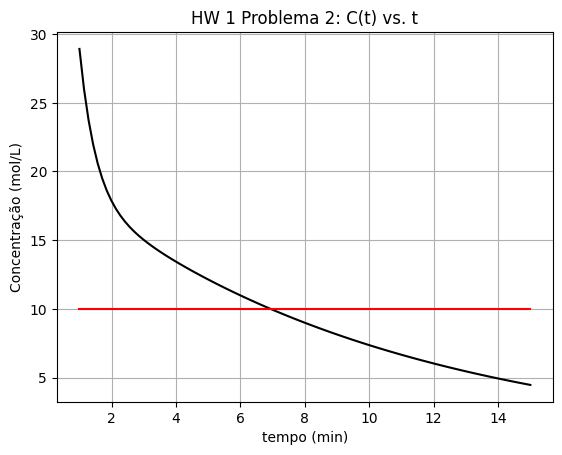

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problema 2A
def conc(t):
    c = 80*np.exp(-2*t)+20*np.exp(-0.1*t)
    return c

t = np.linspace(1,15,100)
plt.plot(t,conc(t),'k-')

y = 10*np.ones(100)
plt.plot(t,y, 'r')

plt.xlabel("tempo (min)")
plt.ylabel("Concentração (mol/L)")
plt.title("HW 1 Problema 2: C(t) vs. t")
plt.grid()
plt.show()


In [ ]:
# Problema 2B
t = 0.0      # Chute inicial
erro = np.abs(conc(t)-10)
tol = 0.001

k = 0           # Contador de iterações

while erro>tol:
    t = 80*np.exp(-2*t)+20*np.exp(-0.1*t)-10+t
    erro = np.abs(conc(t)-10)
    k = k + 1
    if k==100:
        print('Não convergiu em 1000 passos')
        break

print(f"O raiz de C(t) é t = {t} min")
print(f"O código convergiu em k = {k} iterações")


O raiz de C(t) é t = 6.931547983493047 min
O código convergiu em k = 13 iterações


---
# Problema 3
---

In [ ]:
import numpy as np

# Definir os valores de entrada
n = np.array([0.035,0.020,0.015,0.030,0.022])           # Coeficiente de reugosidade
S = np.array([0.0001,0.0002,0.0010,0.0007,0.0003])      # Inclinação do canal (m)
B = np.array([10.0,8.0,20.0,24.0,15.0])                 # Largura do canal (m)
H = np.array([2.0,1.0,1.5,3.0,2.5])                     # Profundidade do canal (m)

# Inicializar o vetor de velocidades (m/s)
U = np.zeros((5,5))

# Imprimir o cabeçalho da tabela
print(f"{'n':^10}{'S (m)':^10}{'B (m)':^10}{'H (m)':^10}{'U (m/s)':^10}")

# Calcular os valores de U (m/s)
for i in range(len(n)):
    U[i] = (np.sqrt(S[i])/n[i])*((B[i]*H[i])/(B[i]+(2*H[i])))**(2/3)

    # Imprimir as linhas da tabela
    print(f"{n[i]:^10.3f}{S[i]:^10.4f}{B[i]:^10}{H[i]:^10}{U[i][0]:^10.4f}")

    n       S (m)     B (m)     H (m)    U (m/s)  
  0.035     0.0001     10.0      2.0      0.3624  
  0.020     0.0002     8.0       1.0      0.6094  
  0.015     0.0010     20.0      1.5      2.5167  
  0.030     0.0007     24.0      3.0      1.5809  
  0.022     0.0003     15.0      2.5      1.1971  


---
# Problema 4 (Sistemas Lineares - Eliminação Gaussiana)
---

Implementar o algoritmo de eliminação gaussiana ingênua (sem pivotamento).

In [ ]:
import numpy as np

def linear_ngaussel(A, b):
    n = len(b)
    x = np.zeros(n)

    # Realiza a eliminação direta (forward elimination)
    for k in range(n-1):
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            for j in range(k+1, n):
                A[i, j] = A[i, j] - m * A[k, j]
            b[i] = b[i] - m * b[k]

    # Realiza a substituição reversa (back substitution)
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        S = b[i]
        for j in range(i+1, n):
            S = S - A[i, j] * x[j]
        x[i] = S / A[i, i]

    return x


## Problema 4(a)

In [ ]:
A = np.array([[0.0, 2.0, 3.0],
              [2.0, 3.0, 1.0],
              [1.0, -1.0, -2.0]])
b = np.array([8.0, 5.0, 5.0])

cond_A = np.linalg.cond(A) # Função do Python que retorna o número de condicionamento
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b) # Eliminação Gaussiana Simples (ingênua)
print(f'x={x}')

cond(A)=13.791138945990635
x=[nan nan nan]


<ipython-input-1-795f6dc8c473>:10: RuntimeWarning: divide by zero encountered in scalar divide
  m = A[i, k] / A[k, k]
<ipython-input-1-795f6dc8c473>:10: RuntimeWarning: invalid value encountered in scalar divide
  m = A[i, k] / A[k, k]


Como a eliminação gaussiana simples (sem pivotamento) não funcionou, é um indicador de que temos um elemento zero na diagonal. Portanto, vamos implementar a eliminação gaussiana com pivotamento parcial, trocando apenas as linhas.

In [ ]:
import numpy as np

def linear_gauss_pivot(A, b):
    n = len(b)
    x = np.zeros(n)

    for k in range(n - 1):
        Amax = A[k, k]
        swap_row = k

        # Realiza o pivotamento, se necessário
        for i in range(k + 1, n):
            if A[i, k] > Amax:
                Amax = A[i, k]
                swap_row = i

        if swap_row != k:
            old_pivot = np.copy(A[k, :])
            old_b = b[k]
            A[k, :] = A[swap_row, :]
            A[swap_row, :] = old_pivot
            b[k] = b[swap_row]
            b[swap_row] = old_b

        # Realiza a eliminação direta (forward elimination)
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            for j in range(k + 1, n):
                A[i, j] = A[i, j] - m * A[k, j]
            b[i] = b[i] - m * b[k]

    # Realiza a substituição reversa (back substitution)
    x[n - 1] = b[n - 1] / A[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        S = b[i]
        for j in range(i + 1, n):
            S = S - A[i, j] * x[j]
        x[i] = S / A[i, i]

    return x

In [ ]:
A = np.array([[0.0, 2.0, 3.0],
              [2.0, 3.0, 1.0],
              [1.0, -1.0, -2.0]])
b = np.array([8.0, 5.0, 5.0])

cond_A = np.linalg.cond(A) # Função do Python que retorna o número de condicionamento
print(f'cond(A)={cond_A}')

x = linear_gauss_pivot(A, b) # Eliminação Gaussiana com Pivotamento Parcial
print(f'x={x}')

cond(A)=13.791138945990635
x=[ 14. -11.  10.]


Desta vez obtemos o resultado correto! Não foi necessário pivotamento total (linhas e colunas)

## Problema 4(b)

In [ ]:
A = np.array([[1.0,2.0,-3.0],
              [2.0,-1.0,1.0],
              [4.0,-1.0,1.0]])
b = np.array([9.0,0.0,4.0])
cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b) # Eliminação Gaussiana Simples (ingênua)

print(f'x={x}')


cond(A)=44.93268915365801
x=[2. 5. 1.]


In [ ]:
A = np.array([[1,2,-3],
              [2,-1,1],
              [4,-1,1]], dtype='float')
b = np.array([9,0,4], dtype='float')
cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b) # Eliminação Gaussiana Simples (ingênua)

print(f'x={x}')


cond(A)=44.93268915365801
x=[2. 5. 1.]


## Problema 4(c)

In [ ]:
A = np.array([[1.0,2.0,-1.0],
              [5.0,2.0,2.0],
              [-3.0,5.0,-1.0]])
b = np.array([2.0,9.0,1.0])

cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b) # Eliminação Gaussiana Simples (ingênua)
print(f'x={x}')

cond(A)=5.114022382360344
x=[1. 1. 1.]


## Problema 4(d)

In [ ]:
A = np.array([[6.0,1.0,0.0,-3.0],
              [-2.0,8.0,2.0,3.0],
              [1.0,-6.0,10.0,-2.0],
              [2.0,1.0,3.0,9.0]])
b = np.array([-9.0,9.0,17.0,13.0])

cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b)
print(f'x={x}')

cond(A)=2.0227322205378355
x=[-1.  0.  2.  1.]
